In [1]:
# packages
import numpy as np
import matplotlib.pyplot as plt
from plt_logistic_loss import  plt_logistic_cost, plt_two_logistic_loss_curves, plt_simple_example
from plt_logistic_loss import soup_bowl, plt_logistic_squared_error

%matplotlib widget
plt.style.use('./deeplearning.mplstyle')

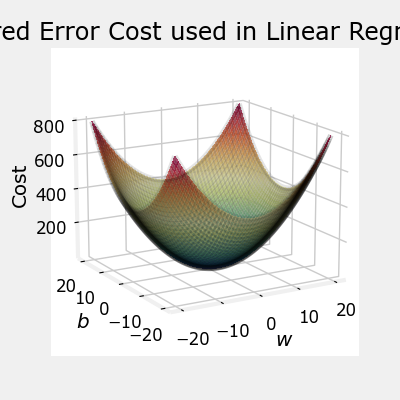

In [2]:
soup_bowl()

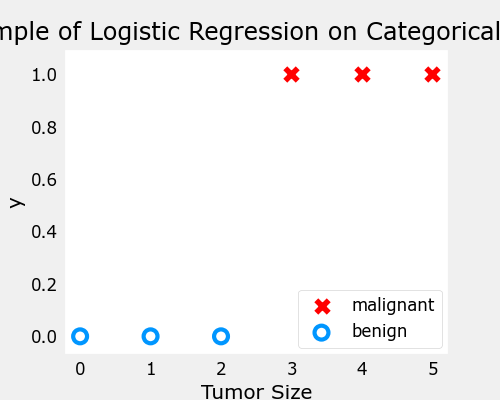

In [3]:
x_train = np.array([0., 1, 2, 3, 4, 5],dtype=np.longdouble)
y_train = np.array([0,  0, 0, 1, 1, 1],dtype=np.longdouble)
plt_simple_example(x_train, y_train)

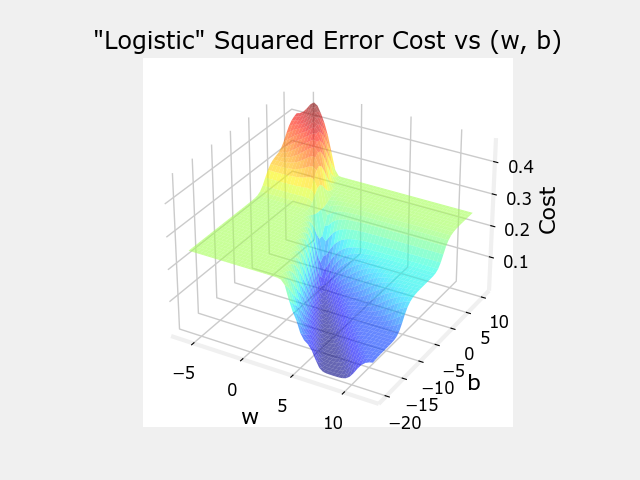

In [4]:
plt.close('all')
plt_logistic_squared_error(x_train, y_train)
plt.show()

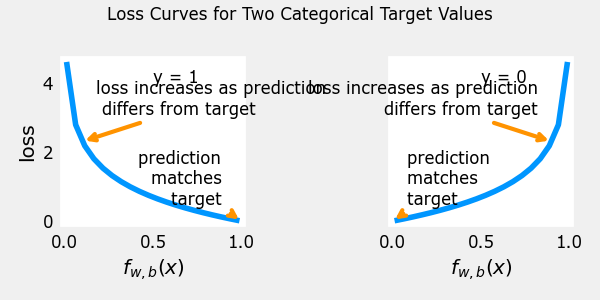

In [5]:
plt_two_logistic_loss_curves()

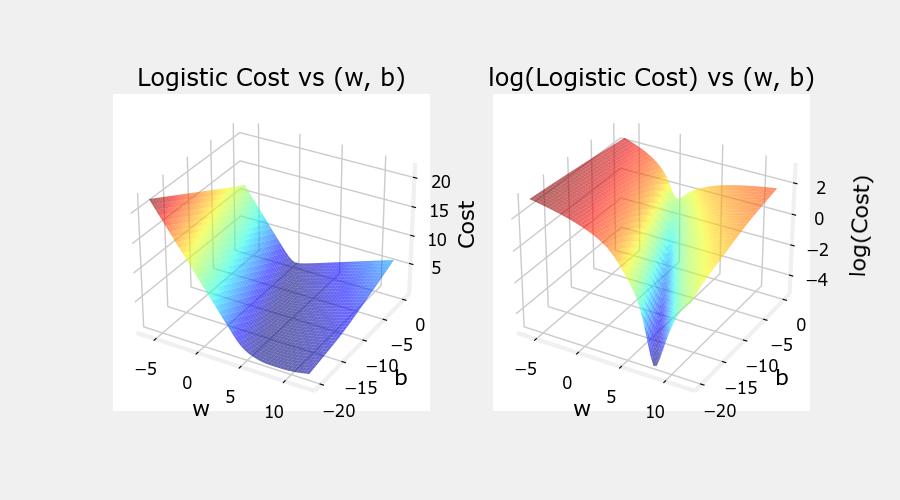

In [6]:
cst = plt_logistic_cost(x_train, y_train)

In [7]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n) (6, 2)(2, 1)->(6, 1)
y_train = np.array([0, 0, 0, 1, 1, 1])  
w = [1, 1]
b = 3
f = np.dot(x_train, w)+b
print(np.dot(x_train, w)+b)

[5.  5.  5.  6.5 7.  6.5]


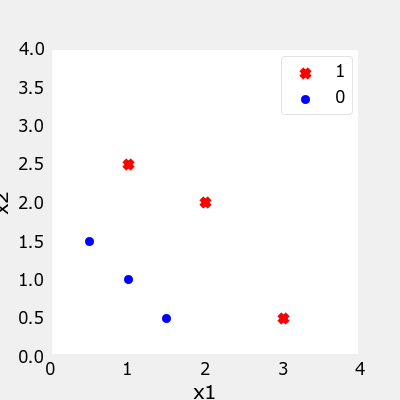

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.scatter(x_train[3:, 0], x_train[3:, 1], marker='x', c='red', label='1')
ax.scatter(x_train[:3, 0], x_train[:3, 1], marker='o', c='blue', label='0')

ax.axis([0, 4, 0, 4])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.show()

In [9]:
def sigmoid(z):
    return 1./(1. + np.exp(-z))

In [10]:
w = [1, 1]
b = -3
f = sigmoid(np.dot(x_train, w)+b)
print(f)
print(y_train.shape)
print(f.shape)
cost = -np.dot(y_train, np.log(f)) - np.dot((1-y_train), np.log(1-f))
print(cost)

[0.26894142 0.26894142 0.26894142 0.62245933 0.73105858 0.62245933]
(6,)
(6,)
2.2012007184331046


In [11]:
def compute_cost_logistic(x, y, w, b):
    
    n_samples = x.shape[0]
    f = sigmoid(np.dot(x, w)+b)
    cost = -np.dot(y_train, np.log(f)) - np.dot((1-y_train), np.log(1-f))
    
    return cost/n_samples

In [12]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(x_train, y_train, w_tmp, b_tmp))

0.36686678640551745


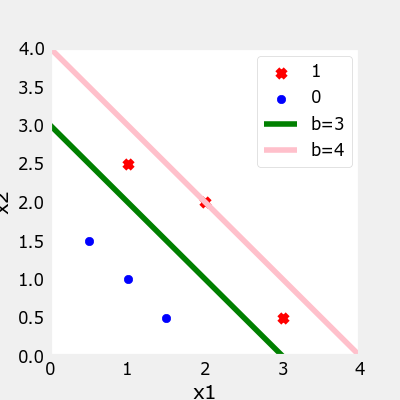

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.scatter(x_train[3:, 0], x_train[3:, 1], marker='x', c='red', label='1')
ax.scatter(x_train[:3, 0], x_train[:3, 1], marker='o', c='blue', label='0')
ax.axis([0, 4, 0, 4])
ax.set_xlabel('x1')
ax.set_ylabel('x2')

x1 = np.arange(0, 6)
x2 = 3 - x1
x2_other = 4 - x1
ax.plot(x1, x2, c='green', label='b=3')
ax.plot(x1, x2_other, c='pink', label='b=4')

ax.legend()
plt.show()

In [14]:
w_1 = np.array([1, 1])
b_1 = -3
w_2 = np.array([1, 1])
b_2 = -4

cost_model_1 = compute_cost_logistic(x_train, y_train,w_1 , b_1)
cost_model_2 = compute_cost_logistic(x_train, y_train,w_2 , b_2)

print(f'cost of model 1: {cost_model_1}')
print(f'cost of model 2: {cost_model_2}')

cost of model 1: 0.36686678640551745
cost of model 2: 0.5036808636748461


In [15]:
x_train.shape
y_train.shape

(6,)

# Gradient Descent for Log Cost

In [16]:
# Compute gradient 
def compute_gradient_logistic(x, y, w, b ):
    """
    x: (m, n)
    y: (m, )
    w: (n, )
    b: scalar
    """
    (n_samples, n_features) = x.shape
    
    dw = np.zeros(n_features)
    db = 0.
    
    for sample in range(n_samples): # loop over m samples
        error = sigmoid(np.dot(w, x[sample]) + b) - y[sample]
        for weight in range(n_features): # loop over n features
            dw[weight] += error * x[sample, weight]
        db += error
    dw /= n_samples
    db /= n_samples
    return dw, db

In [17]:
def compute_gradient_logistic_vector(x, y, w, b):
    
    (n_samples, n_features) = x.shape
    
    error = sigmoid(np.dot(x, w) + b) - y # (m, 1)
    
    dw = np.dot(error, x)/n_samples
    db = np.sum(error)/n_samples
    
    return dw, db

In [18]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_dw_tmp, dj_db_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_dw: {dj_dw_tmp.tolist()}" )
print(f"dj_db: {dj_db_tmp}" )

dj_dw: [0.498333393278696, 0.49883942983996693]
dj_db: 0.49861806546328574


In [19]:
dj_dw_tmp, dj_db_tmp = compute_gradient_logistic_vector(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_dw: {dj_dw_tmp.tolist()}" )
print(f"dj_db: {dj_db_tmp}" )

dj_dw: [0.498333393278696, 0.49883942983996693]
dj_db: 0.49861806546328574


In [20]:
def gradient_descent(x, y, w, b, learning_rate, iterations):
    
    J_history = []
    for i in range(iterations):
        dw, db = compute_gradient_logistic_vector(x, y, w, b)
        w -= learning_rate * dw
        b -= learning_rate * db
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(x, y, w, b) )
        if i% 1000 == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
    
    return w, b, J_history

In [21]:
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(x_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.15909776668704562   
Iteration 2000: Cost 0.08460064176930084   
Iteration 3000: Cost 0.05705327279402528   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884565   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.021423703325692895   
Iteration 9000: Cost 0.019030137124109094   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019839


In [22]:
import matplotlib.colors as colors
from matplotlib import cm
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    """ truncates color map """
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
def plt_prob(ax, w_out,b_out):
    """ plots a decision boundary but include shading to indicate the probability """
    #setup useful ranges and common linspaces
    x0_space  = np.linspace(0, 4 , 100)
    x1_space  = np.linspace(0, 4 , 100)

    # get probability for x0,x1 ranges
    tmp_x0,tmp_x1 = np.meshgrid(x0_space,x1_space)
    z = np.zeros_like(tmp_x0)
    for i in range(tmp_x0.shape[0]):
        for j in range(tmp_x1.shape[1]):
            z[i,j] = sigmoid(np.dot(w_out, np.array([tmp_x0[i,j],tmp_x1[i,j]])) + b_out)


    cmap = plt.get_cmap('Blues')
    new_cmap = truncate_colormap(cmap, 0.0, 0.5)
    pcm = ax.pcolormesh(tmp_x0, tmp_x1, z,
                   norm=cm.colors.Normalize(vmin=0, vmax=1),
                   cmap=new_cmap, shading='nearest', alpha = 0.9)
    ax.figure.colorbar(pcm, ax=ax)

def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
    neg = neg.reshape(-1,)

    # Plot examples
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=s, label=neg_label, facecolors='blue', lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

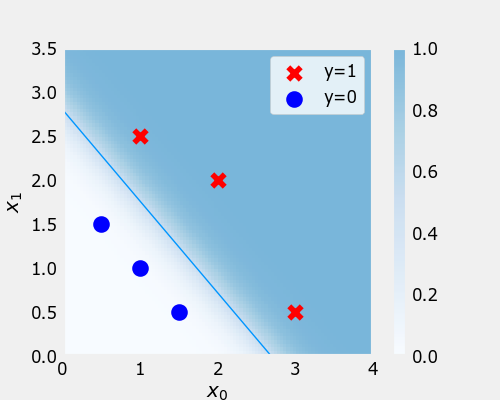

In [23]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
# plot the probability 
plt_prob(ax, w_out, b_out)

ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
plot_data(x_train,y_train,ax)

x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], lw=1)
plt.show()

In [24]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1]) 

In [25]:
# from lab_utils_common import  dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob

In [26]:
def plt_tumor_data(x, y, ax):
    """ plots tumor data on one axis """
    pos = y == 1
    neg = y == 0

    ax.scatter(x[pos], y[pos], marker='x', s=80, c = 'red', label="malignant")
    ax.scatter(x[neg], y[neg], marker='o', s=100, label="benign", facecolors='none',lw=3, c = 'blue')
    ax.set_ylim(-0.175,1.1)
    ax.set_ylabel('y')
    ax.set_xlabel('Tumor Size')
    ax.set_title("Logistic Regression on Categorical Data")

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

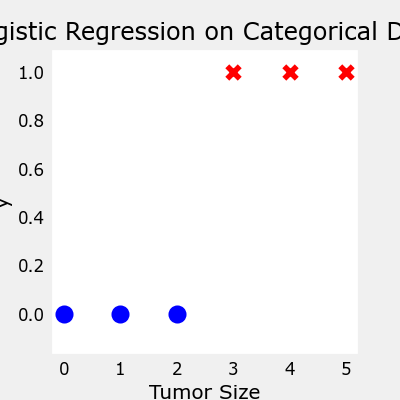

In [27]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plt_tumor_data(x_train, y_train, ax)
plt.show()

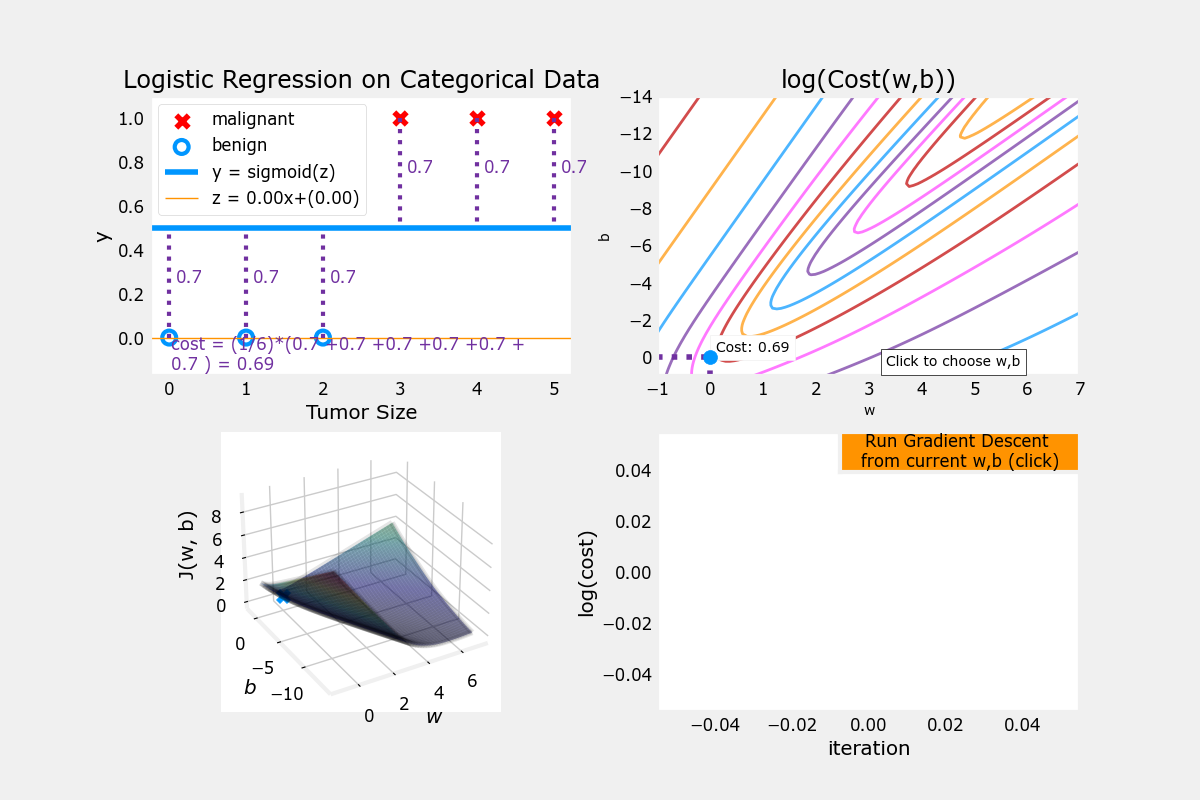

In [28]:
w_range = np.array([-1, 7])
b_range = np.array([1, -14])
quad = plt_quad_logistic( x_train, y_train, w_range, b_range )